# Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt

# Read the data

In [2]:
test_data=pd.read_csv(r"C:\Users\90544\Desktop\dataset_a3\voice_dataset\test_data.csv")
test_data

,filename,text,age,gender,accent
0,sample-008291.png,watching the parody was great entertainment,twenties,male,indian
1,sample-099767.png,what'll i tell him,twenties,male,us
2,sample-149649.png,it was a strange furnace fueled by firewood wi...,twenties,female,us
3,sample-183749.png,and she already has her treasure it's you,twenties,other,ireland
4,sample-192527.png,not everyone can see his dreams come true in t...,twenties,male,indian
...,...,...,...,...,...
2395,sample-073042.png,this requires a little thought here,teens,male,us
2396,sample-025959.png,at that time it was quite clear in my own mind...,teens,male,england
2397,sample-146727.png,it was a bundle of money,teens,female,canada
2398,sample-140728.png,i thought you were gone,teens,male,england


In [3]:
train_data=pd.read_csv(r"C:\Users\90544\Desktop\dataset_a3\voice_dataset\train_data.csv")
train_data

,filename,text,age,gender,accent
0,sample-084720.png,i had seen all that it would presently bring me,twenties,other,england
1,sample-169346.png,a friend had told the boy about the shop and h...,twenties,male,england
2,sample-027740.png,the boy said nothing,twenties,male,indian
3,sample-035454.png,what is the matter,twenties,male,us
4,sample-134062.png,no baselines or comparison to state of the art...,twenties,female,australia
...,...,...,...,...,...
9595,sample-047019.png,i've done nothing of the sort,teens,male,england
9596,sample-074245.png,air was either entering or escaping at the rim...,teens,male,us
9597,sample-071603.png,do you have any secret hiding place here in th...,teens,male,england
9598,sample-108781.png,the train lines provided an easy path to follow,teens,female,canada


In [4]:
train_data["age"]=train_data["age"].replace("teens",0)
train_data["age"]=train_data["age"].replace("twenties",1)
train_data["age"]=train_data["age"].replace("thirties",2)
train_data["age"]=train_data["age"].replace("fourties",3)
train_data["age"]=train_data["age"].replace("fifties",4)
train_data["age"]=train_data["age"].replace("sixties",5)

In [5]:
basepath=r"C:\Users\90544\Desktop\dataset_a3\voice_dataset\train"

train_X=[]
train_Y=[]

for i in range(len(train_data)):
    #import file row
    file = train_data.iloc[i]
    
    #load image
    image = tf.keras.utils.load_img(basepath +"\\"+file['filename'])
    
    #convert rgb image to grayscale
    grayscale_image = tf.image.rgb_to_grayscale(image)
    
    #normalized image values 0,255 to between 0,1
    grayscale_image=grayscale_image/255

    resized_image = tf.image.resize(grayscale_image, (256, 256))

    #append the image and age attributes to lists
    train_X.append(resized_image)
    train_Y.append(file["age"])

In [6]:
# Find unique categories
unique_categories = np.unique(train_Y)

# Creating an empty matrix to encode each category one-hot
one_hot_matrix = np.zeros((len(train_Y), len(unique_categories)))

# Mark the columns corresponding to each category as 1
for i, train_Y in enumerate(train_Y):
    one_hot_matrix[i, np.where(unique_categories == train_Y)] = 1

In [7]:
test_data["age"]=test_data["age"].replace("teens",0)
test_data["age"]=test_data["age"].replace("twenties",1)
test_data["age"]=test_data["age"].replace("thirties",2)
test_data["age"]=test_data["age"].replace("fourties",3)
test_data["age"]=test_data["age"].replace("fifties",4)
test_data["age"]=test_data["age"].replace("sixties",5)

In [8]:
basepath=r"C:\Users\90544\Desktop\dataset_a3\voice_dataset\test"

test_X=[]
test_Y=[]

for i in range(len(test_data)):
    #import file row
    file = test_data.iloc[i]
    
    #load image
    image = tf.keras.utils.load_img(basepath +"\\"+file['filename'])
    
    #convert rgb image to grayscale
    grayscale_image = tf.image.rgb_to_grayscale(image)
    
    #normalized image values 0,255 to between 0,1
    grayscale_image=grayscale_image/255

    resized_image = tf.image.resize(grayscale_image, (256, 256))

    #append the image and age attributes to lists
    test_X.append(resized_image)
    test_Y.append(file["age"])

In [9]:
# Find unique categories
unique_categories = np.unique(test_Y)

# Creating an empty matrix to encode each category one-hot
one_hot_matrix_test = np.zeros((len(test_Y), len(unique_categories)))

# Mark the columns corresponding to each category as 1
for i, test_Y in enumerate(test_Y):
    one_hot_matrix_test[i, np.where(unique_categories == test_Y)] = 1

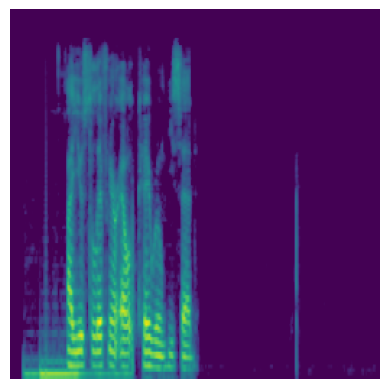

In [10]:
plt.imshow(train_X[6])
#plt.title(train_Y[6])
plt.axis("off")
plt.show()

In [11]:
x = np.array(train_X)
y = np.array(one_hot_matrix)

In [12]:
x = x.reshape((9600, 65536))

In [13]:
x_test = np.array(test_X)
y_test = np.array(one_hot_matrix_test)

In [14]:
x_test = x_test.reshape((2400, 65536))

In [15]:
x

array([[0.11764706, 0.1764706 , 0.1764706 , ..., 0.26666668, 0.26666668,
        0.26666668],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.24082415, 0.23169424,
        0.21176471],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.11764706, 0.11764706,
        0.11764706],
       ...,
       [0.11764706, 0.11764706, 0.11764706, ..., 0.29394916, 0.2901961 ,
        0.2901961 ],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.38431373, 0.40687805,
        0.40784314],
       [0.11764706, 0.11764706, 0.11764706, ..., 0.3218367 , 0.32156864,
        0.29411766]], dtype=float32)

# Neural Network

In [16]:
def initialize_parameters(input_size, hidden_layers, output_size):
    sizes = [input_size] + hidden_layers + [output_size]
    weights = [np.random.randn(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
    biases = [np.zeros((1, sizes[i+1])) for i in range(len(sizes)-1)]
    return weights, biases

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def activate(x, activation):
    if activation == 'sigmoid':
        return sigmoid(x)
    elif activation == 'relu':
        return relu(x)
    elif activation == 'softmax':
        return softmax(x)

def forward_propagation(x, weights, biases, activation):
    activations = [x]
    for i in range(len(weights) - 1):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        a = activate(z, activation)
        activations.append(a)
    output = np.dot(activations[-1], weights[-1]) + biases[-1]
    output = activate(output, activation)
    activations.append(output)
    return activations

def compute_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8))

def backward_propagation(x_batch, y_batch, activations, weights, biases, learning_rate, activation):
    m = x_batch.shape[0]
    gradients = [activations[-1] - y_batch]
    for i in range(len(weights) - 1, 0, -1):
        dz = np.dot(gradients[0], weights[i].T)
        da = dz * (activations[i] > 0) if activation == 'relu' else dz
        dw = np.dot(activations[i-1].T, da) / m
        db = np.sum(da, axis=0, keepdims=True) / m
        gradients.insert(0, da)
        weights[i-1] -= learning_rate * dw
        biases[i-1] -= learning_rate * db

    dw = np.dot(x_batch.T, gradients[0]) / m
    db = np.sum(gradients[0], axis=0, keepdims=True) / m
    weights[0] -= learning_rate * dw
    biases[0] -= learning_rate * db

def train_neural_network(x, y, input_size, hidden_layers, output_size, activation, epochs, learning_rate, batch_size):
    weights, biases = initialize_parameters(input_size, hidden_layers, output_size)
    m = x.shape[0]
    loss_list=[]
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            activations = forward_propagation(x_batch, weights, biases, activation)
            loss = compute_loss(y_batch, activations[-1])
            backward_propagation(x_batch, y_batch, activations, weights, biases, learning_rate, activation)

        accuracy = compute_accuracy(y, predict(x, weights, biases, activation))
        #print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}%")
        loss_list.append(loss)
    loss_mean=sum(loss_list)/len(loss_list)
    return weights, biases ,loss_mean # Return trained weights and biases

def compute_accuracy(y_true, y_pred):
    predictions = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    correct_predictions = np.sum(predictions == true_labels)
    total_examples = y_true.shape[0]
    accuracy = (correct_predictions / total_examples) * 100
    return accuracy

def predict(x, weights, biases, activation):
    activations = forward_propagation(x, weights, biases, activation)
    return activations[-1]

In [17]:
table=[]

# Single-layer neural network

In [18]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([1,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [19]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'sigmoid'
batch_size = 64
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([2,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [20]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'sigmoid'
batch_size = 32
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([3,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [21]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([4,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [22]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'relu'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([5,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [23]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([6,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [24]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([7,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [25]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.01

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([8,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [26]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'relu'
batch_size = 128
learning_rate=0.01

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([9,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [27]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = []
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.015

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([10,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

# Result for one layer neural network

In [28]:
from tabulate import tabulate
tablo = tabulate(table, headers=['Experiment', 'Input Size' , 'Model Activation Func.', 'Hidden Layer Size',
                              'Learning Rate', 'Batch Size', 'Mean of the loss', 'Accuracy'], tablefmt='grid')
print(tablo)

+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|   Experiment |   Input Size | Model Activation Func.   | Hidden Layer Size   |   Learning Rate |   Batch Size |   Mean of the loss |   Accuracy |
+==============+==============+==========================+=====================+=================+==============+====================+============+
|            1 |        65536 | sigmoid                  | []                  |           0.005 |          128 |        0.742487    |    17.2917 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|            2 |        65536 | sigmoid                  | []                  |           0.005 |           64 |        0.116161    |    16.6667 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------

In [29]:
table=[]

# Neural network that contains one hidden layer

In [30]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([1,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


In [31]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([2,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [32]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 64
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([3,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [33]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 32
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([4,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [34]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([5,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [35]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [64]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([6,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [36]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'relu'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([7,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


In [37]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([8,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


In [38]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'relu'
batch_size = 64
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([9,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


In [39]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128]
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.01

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([10,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])


# Result of neural network that contains one hidden layer

In [40]:
tablo = tabulate(table, headers=['Experiment', 'Input Size' , 'Model Activation Func.', 'Hidden Layer Size',
                              'Learning Rate', 'Batch Size', 'Mean of the loss', 'Accuracy'], tablefmt='grid')
print(tablo)

+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|   Experiment |   Input Size | Model Activation Func.   | Hidden Layer Size   |   Learning Rate |   Batch Size |   Mean of the loss |   Accuracy |
+==============+==============+==========================+=====================+=================+==============+====================+============+
|            1 |        65536 | sigmoid                  | [128]               |           0.005 |          128 |        5.63961e-09 |    16.6667 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|            2 |        65536 | sigmoid                  | [128]               |           0.005 |          128 |       -1.32599e-09 |    16.6667 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------

In [41]:
table=[]

# Neural network that contains two hidden layers.

In [42]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([1,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [43]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 64
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([2,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [44]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 32
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([3,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [45]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([4,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [46]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [64,64]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([5,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [47]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'relu'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([6,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [48]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.005

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([7,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

In [49]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [128,128]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.01

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([8,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [50]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [64,64]
output_size = 6
activation_function = 'sigmoid'
batch_size = 128
learning_rate=0.01

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([9,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

C:\Users\90544\AppData\Local\Temp\ipykernel_316\28911492.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [51]:
# Define input size, hidden layers, output size, activation function
input_size = 256*256
hidden_layers = [64,128]
output_size = 6
activation_function = 'softmax'
batch_size = 128
learning_rate=0.02

# Train the neural network 
trained_weights, trained_biases,loss_mean = train_neural_network(x, y, input_size, hidden_layers, output_size, activation_function, epochs=10, learning_rate=learning_rate, batch_size=batch_size)

# Predict the test values using trained weights and biases
test_predictions = predict(x_test, trained_weights, trained_biases, activation_function)

# Calculate accuracy on the test set
test_accuracy = compute_accuracy(y_test, test_predictions)
#print(f"Test Accuracy: {test_accuracy}%")

table.append([10,input_size,activation_function,hidden_layers,learning_rate,batch_size,loss_mean,test_accuracy])

# Result of neural network that contains two hidden layer

In [52]:
tablo = tabulate(table, headers=['Experiment', 'Input Size' , 'Model Activation Func.', 'Hidden Layer Size',
                              'Learning Rate', 'Batch Size', 'Mean of the loss', 'Accuracy'], tablefmt='grid')
print(tablo)

+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|   Experiment |   Input Size | Model Activation Func.   | Hidden Layer Size   |   Learning Rate |   Batch Size |   Mean of the loss |   Accuracy |
+==============+==============+==========================+=====================+=================+==============+====================+============+
|            1 |        65536 | sigmoid                  | [128, 128]          |           0.005 |          128 |         0.0346749  |    16.6667 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------+--------------------+------------+
|            2 |        65536 | sigmoid                  | [128, 128]          |           0.005 |           64 |         0.00430238 |    16.6667 |
+--------------+--------------+--------------------------+---------------------+-----------------+--------------

In [57]:
table=[]

# Convolutional Neural Network that contains one convolutional layer and one fully connected layer

In [56]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [58]:
# Reshape the input data to be suitable for a Conv2D layer
x_train_reshaped = x.reshape((9600, 256, 256, 1))  # Adjust the shape based on the actual size of images

# Define the model
model = models.Sequential()

# Add Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))

# Flatten the output to feed into the fully connected layer
model.add(layers.Flatten())

# Add Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(6, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
x_test_reshaped = x_test.reshape((2400, 256, 256, 1))
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

table.append([1,256*256,"relu",32,64,test_loss,test_accuracy])




Epoch 1/10


120/120 [==============================] - 210s 2s/step - loss: 8.1364 - accuracy: 0.1862 - val_loss: 10.5191 - val_accuracy: 0.0000e+00
Epoch 2/10
120/120 [==============================] - 192s 2s/step - loss: 8.1314 - accuracy: 0.2135 - val_loss: 10.5199 - val_accuracy: 0.0193
Epoch 3/10
120/120 [==============================] - 192s 2s/step - loss: 7.7125 - accuracy: 0.2353 - val_loss: 4.7326 - val_accuracy: 0.0141
Epoch 4/10
120/120 [==============================] - 187s 2s/step - loss: 3.8643 - accuracy: 0.2246 - val_loss: 4.6624 - val_accuracy: 0.0359
Epoch 5/10
120/120 [==============================] - 184s 2s/step - loss: 3.8553 - accuracy: 0.2363 - val_loss: 4.6594 - val_accuracy: 0.0672
Epoch 6/10
120/120 [==============================] - 184s 2s/step - loss: 3.8520 - accuracy: 0.2461 - val_loss: 4.6570 - val_accuracy: 0.1083
Epoch 7/10
120/120 [==============================] - 182s 2s/step - loss: 3.8790 - accuracy: 0.2047 - val_loss: 4.6719 - val_accura

In [60]:
# Reshape the input data to be suitable for a Conv2D layer
x_train_reshaped = x.reshape((9600, 256, 256, 1))  # Adjust the shape based on the actual size of images

# Define the model
model = models.Sequential()

# Add Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))

# Flatten the output to feed into the fully connected layer
model.add(layers.Flatten())

# Add Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(6, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, y, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
x_test_reshaped = x_test.reshape((2400, 256, 256, 1))
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

table.append([1,256*256,"relu",32,32,test_loss,test_accuracy])

Epoch 1/10
240/240 [==============================] - 315s 1s/step - loss: 8.9529 - accuracy: 0.1668 - val_loss: 7.3565 - val_accuracy: 0.2083
Epoch 2/10
240/240 [==============================] - 309s 1s/step - loss: 8.9197 - accuracy: 0.1749 - val_loss: 7.3544 - val_accuracy: 0.2062
Epoch 3/10
240/240 [==============================] - 311s 1s/step - loss: 8.9140 - accuracy: 0.1909 - val_loss: 7.3533 - val_accuracy: 0.2135
Epoch 4/10
240/240 [==============================] - 312s 1s/step - loss: 8.9076 - accuracy: 0.1962 - val_loss: 7.3472 - val_accuracy: 0.2396
Epoch 5/10
240/240 [==============================] - 309s 1s/step - loss: 8.9133 - accuracy: 0.2203 - val_loss: 7.3356 - val_accuracy: 0.2500
Epoch 6/10
240/240 [==============================] - 312s 1s/step - loss: 8.9257 - accuracy: 0.2307 - val_loss: 7.4312 - val_accuracy: 0.2083
Epoch 7/10
240/240 [==============================] - 309s 1s/step - loss: 8.9174 - accuracy: 0.1914 - val_loss: 7.3500 - val_accuracy: 0.2297

In [ ]:
# Reshape the input data to be suitable for a Conv2D layer
x_train_reshaped = x.reshape((9600, 256, 256, 1))  # Adjust the shape based on the actual size of images

# Define the model
model = models.Sequential()

# Add Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(256, 256, 1)))

# Flatten the output to feed into the fully connected layer
model.add(layers.Flatten())

# Add Fully Connected Layer
model.add(layers.Dense(64, activation='sigmoid'))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(6, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, y, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
x_test_reshaped = x_test.reshape((2400, 256, 256, 1))
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

table.append([1,256*256,"sigmoid",32,64,test_loss,test_accuracy])

Epoch 1/10
120/120 [==============================] - 193s 2s/step - loss: 2.1101 - accuracy: 0.2073 - val_loss: 1.8703 - val_accuracy: 0.0000e+00
Epoch 2/10
120/120 [==============================] - 196s 2s/step - loss: 1.7870 - accuracy: 0.2083 - val_loss: 1.8428 - val_accuracy: 0.0000e+00
Epoch 3/10
120/120 [==============================] - 191s 2s/step - loss: 1.7872 - accuracy: 0.2083 - val_loss: 1.8394 - val_accuracy: 0.0000e+00
Epoch 4/10
120/120 [==============================] - 190s 2s/step - loss: 1.7874 - accuracy: 0.2083 - val_loss: 1.8385 - val_accuracy: 0.0000e+00
Epoch 5/10
120/120 [==============================] - 189s 2s/step - loss: 1.7871 - accuracy: 0.2083 - val_loss: 1.8444 - val_accuracy: 0.0000e+00
Epoch 6/10
120/120 [==============================] - 190s 2s/step - loss: 1.7870 - accuracy: 0.2083 - val_loss: 1.8467 - val_accuracy: 0.0000e+00
Epoch 7/10
120/120 [==============================] - 189s 2s/step - loss: 1.7872 - accuracy: 0.2083 - val_loss: 1.865

# Result of Convolutional Neural Network that contains one convolutional layer and one fully connected layer

In [18]:
from tabulate import tabulate

table=[]
table.append([1,'256*256',"relu",32,64,4.025,0.1904])
table.append([2,'256*256',"relu",32,32,8.58,0.24])
table.append([3,'256*256',"sigmoid",32,64,1.7879,0.2067])
tablo = tabulate(table, headers=['Experiment', 'Input Size' , 'Model Activation Func.', 'Hidden Layer Size', 
                                 'Batch Size', 'Mean of the loss', 'Accuracy'], tablefmt='grid')
print(tablo)

+--------------+--------------+--------------------------+---------------------+--------------+--------------------+------------+
|   Experiment | Input Size   | Model Activation Func.   |   Hidden Layer Size |   Batch Size |   Mean of the loss |   Accuracy |
+==============+==============+==========================+=====================+==============+====================+============+
|            1 | 256*256      | relu                     |                  32 |           64 |             4.025  |     0.1904 |
+--------------+--------------+--------------------------+---------------------+--------------+--------------------+------------+
|            2 | 256*256      | relu                     |                  32 |           32 |             8.58   |     0.24   |
+--------------+--------------+--------------------------+---------------------+--------------+--------------------+------------+
|            3 | 256*256      | sigmoid                  |                  32 |          

In [21]:
table=[]

# Convolutional Neural Network that contains two convolutional layer and two fully connected layer

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape the input data to 2D, assuming it's a grayscale image
x_train_reshaped = x.reshape((x.shape[0], 256, 256, 1))

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_reshaped, y, epochs=10, batch_size=64)






Epoch 1/10


150/150 [==============================] - 138s 895ms/step - loss: 1.8141 - accuracy: 0.2042
Epoch 2/10
150/150 [==============================] - 130s 870ms/step - loss: 1.7193 - accuracy: 0.2642
Epoch 3/10
150/150 [==============================] - 128s 856ms/step - loss: 1.6570 - accuracy: 0.3123
Epoch 4/10
150/150 [==============================] - 131s 876ms/step - loss: 1.5675 - accuracy: 0.3663
Epoch 5/10
150/150 [==============================] - 139s 926ms/step - loss: 1.4494 - accuracy: 0.4273
Epoch 6/10
150/150 [==============================] - 138s 921ms/step - loss: 1.3224 - accuracy: 0.4884
Epoch 7/10
150/150 [==============================] - 134s 894ms/step - loss: 1.1411 - accuracy: 0.5676
Epoch 8/10
150/150 [==============================] - 132s 877ms/step - loss: 0.9479 - accuracy: 0.6518
Epoch 9/10
150/150 [==============================] - 131s 870ms/step - loss: 0.7375 - accuracy: 0.7346
Epoch 10/10
150/150 [==============================] - 126s

NameError: name 'x_test_reshaped' is not defined

In [20]:
x_test_reshaped = x_test.reshape((2400, 256, 256, 1))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
print(f'Test accuracy: {test_acc}')


75/75 [==============================] - 8s 97ms/step - loss: 2.5977 - accuracy: 0.3454
Test accuracy: 0.3454166650772095


# Result of Convolutional Neural Network that contains one convolutional layer and one fully connected layer

In [22]:
table.append([1,'256*256',"relu",[128,64],64,test_loss,test_acc])
tablo = tabulate(table, headers=['Experiment', 'Input Size' , 'Model Activation Func.', 'Hidden Layer Size', 
                                 'Batch Size', 'Mean of the loss', 'Accuracy'], tablefmt='grid')
print(tablo)

+--------------+--------------+--------------------------+---------------------+--------------+--------------------+------------+
|   Experiment | Input Size   | Model Activation Func.   | Hidden Layer Size   |   Batch Size |   Mean of the loss |   Accuracy |
+==============+==============+==========================+=====================+==============+====================+============+
|            1 | 256*256      | relu                     | [128, 64]           |           64 |            2.59766 |   0.345417 |
+--------------+--------------+--------------------------+---------------------+--------------+--------------------+------------+


# Report and Analyze

-I download data set and replace age value with number.I load images from path and store in numpy array. 

-I did one hot encoding for y values which stores label data. I did same steps for test data.

-Then I implement neural network which train model and calculate accuracy by using test data.

-While implementing first I initialize paramters random (weight and biases).My input layer was 256*256 and I calculate hidden layers value for summing weights value for each input pixel and add bias.I implement backpropagation and forward functions.Also implement necessary parts.

-Then I train model for no hidden layer , one hidden layer and two hidden layers.I change parameters and calculate accuracy and loss for each of them.Then I plot the table for each of them.

-I did same step for CNN and I show the result by using table.

-I got the highest accuracy for CNN which is 34%

-I got the minimum loss for mlp with two hidden layer.

-Softmax activation function gives best accuracy for mlp.

-If I increase batch size , test time decrease and I got better accuracy.

-In my opininon if you care time you use mlp but for better accuracy cnn is better than mlp.

-I think no hidden layer should be worst of them. Beceause using hidden layers is training the data and it should be give better result.



note:While I was trying CNN, the computer had a hard time and gave a host error. Jupyter kicked me out of the notebook. I didn't have time to run everything from the beginning, so I just ran the CNN part and added the results manually. There was no change in the results I got in the mlp part anyway. I couldn't do 10 experiments for CNN because I was afraid of the computer shutting down again.